PreProcessing

In [ ]:
df = read.csv('cancer_reg.csv')
print("dimensions:")
ncol(df)
nrow(df)
print("Null Values:")
null_count <- colSums(is.na(df))
null_count
df <- df[ , !(colnames(df) %in% c("PctSomeCol18_24","PctPrivateCoverageAlone"))]
colnames(df)
col_name <- "PctEmployed16_Over"
col_mean <- mean(df[[col_name]], na.rm = TRUE)
df[[col_name]][is.na(df[[col_name]])] <- col_mean
write.csv(df, file = 'Processed.csv', row.names = FALSE)
print("Processed dimensions:")
ncol(df)
nrow(df)
#its just heuristic(intuition) not necessary work i.e. sample mean replacement


[1] "dimensions:"


[1] 32

[1] 3047

[1] "Null Values:"


avgAnnCount       avgDeathsPerYear       TARGET_deathRate 
                     0                      0                      0 
         incidenceRate              medIncome             popEst2015 
                     0                      0                      0 
        povertyPercent            studyPerCap              binnedInc 
                     0                      0                      0 
             MedianAge          MedianAgeMale        MedianAgeFemale 
                     0                      0                      0 
             Geography       AvgHouseholdSize         PercentMarried 
                     0                      0                      0 
          PctNoHS18_24             PctHS18_24        PctBachDeg18_24 
                     0                      0                      0 
          PctHS25_Over      PctBachDeg25_Over     PctEmployed16_Over 
                     0                      0                      0 
  PctUnemployed16_Over     PctPrivateCoverage     PctEmpPrivCoverage 
                     0                      0                      0 
     PctPublicCoverage PctPublicCoverageAlone               PctWhite 
                     0                      0                      0 
              PctBlack               PctAsian           PctOtherRace 
                     0                      0                      0 
  PctMarriedHouseholds              BirthRate 
                     0                      0

[1] "avgAnnCount"            "avgDeathsPerYear"       "TARGET_deathRate"      
 [4] "incidenceRate"          "medIncome"              "popEst2015"            
 [7] "povertyPercent"         "studyPerCap"            "binnedInc"             
[10] "MedianAge"              "MedianAgeMale"          "MedianAgeFemale"       
[13] "Geography"              "AvgHouseholdSize"       "PercentMarried"        
[16] "PctNoHS18_24"           "PctHS18_24"             "PctBachDeg18_24"       
[19] "PctHS25_Over"           "PctBachDeg25_Over"      "PctEmployed16_Over"    
[22] "PctUnemployed16_Over"   "PctPrivateCoverage"     "PctEmpPrivCoverage"    
[25] "PctPublicCoverage"      "PctPublicCoverageAlone" "PctWhite"              
[28] "PctBlack"               "PctAsian"               "PctOtherRace"          
[31] "PctMarriedHouseholds"   "BirthRate"

[1] "Processed dimensions:"


[1] 32

[1] 3047

In [ ]:
colnames(df)

[1] "avgAnnCount"            "avgDeathsPerYear"       "TARGET_deathRate"      
 [4] "incidenceRate"          "medIncome"              "popEst2015"            
 [7] "povertyPercent"         "studyPerCap"            "binnedInc"             
[10] "MedianAge"              "MedianAgeMale"          "MedianAgeFemale"       
[13] "Geography"              "AvgHouseholdSize"       "PercentMarried"        
[16] "PctNoHS18_24"           "PctHS18_24"             "PctBachDeg18_24"       
[19] "PctHS25_Over"           "PctBachDeg25_Over"      "PctEmployed16_Over"    
[22] "PctUnemployed16_Over"   "PctPrivateCoverage"     "PctEmpPrivCoverage"    
[25] "PctPublicCoverage"      "PctPublicCoverageAlone" "PctWhite"              
[28] "PctBlack"               "PctAsian"               "PctOtherRace"          
[31] "PctMarriedHouseholds"   "BirthRate"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 3047
[1] 3047


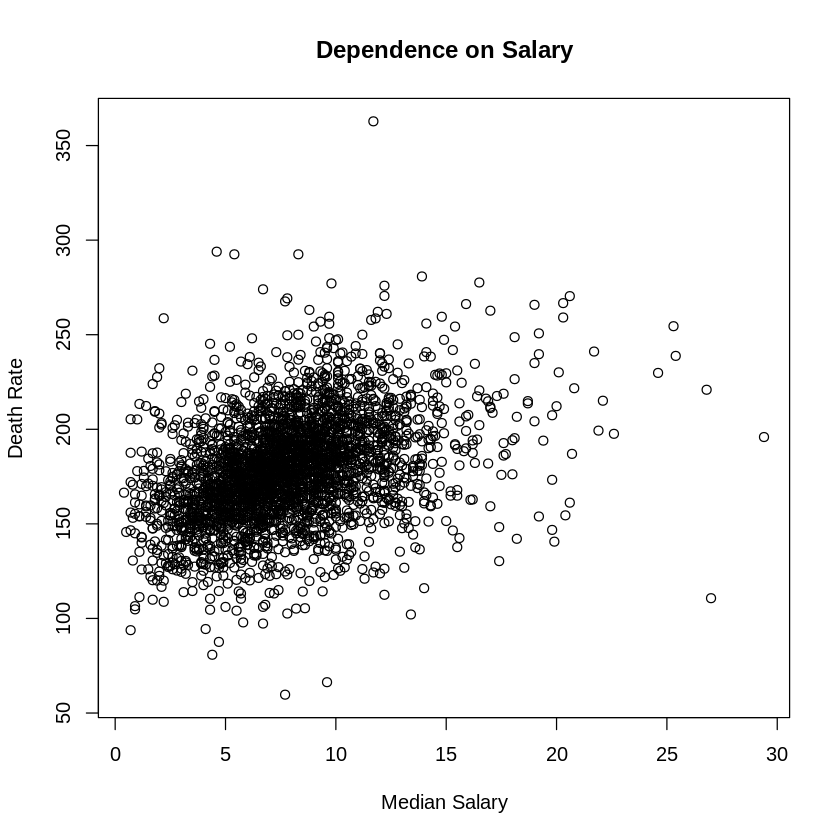

In [ ]:
# Assuming 'df' is your dataframe

# Check if 'df' exists, if not, load it or create it
if (!exists("df")) {
  # Load or create your dataframe 'df'
  # For example:
  # df <- read.csv("your_data.csv")
  # Or: df <- data.frame(medianIncome = c(...), TARGET_deathRate = c(...))
}

# Check if 'dplyr' is installed, if not, install and load it
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}
library(dplyr)

# z_scores <- scale(df_$popEst2015)
# # Define a threshold for outlier detection (e.g., z-score greater than 3)
# threshold <- 1
# # Find indices of outliers
# outlier_indices <- which(abs(z_scores) > threshold)

# # Remove outliers from the dataframe
# df_filtered <- df_[-outlier_indices, ]

# # Remove rows with missing values in 'medianIncome' and 'TARGET_deathRate'
# df_ <- df %>%
#   select("avgDeathsPerYear", "TARGET_deathRate") %>%
#   na.omit()

# Plot the relationship
print(length(df$PctUnemployed16_Over))
print(length(df$TARGET_deathRate))
plot(df$PctUnemployed16_Over, df$TARGET_deathRate,
     main = "Dependence on Salary",
     xlab = "Median Salary",
     ylab = "Death Rate")
    #  ylim = c(0, 300),)


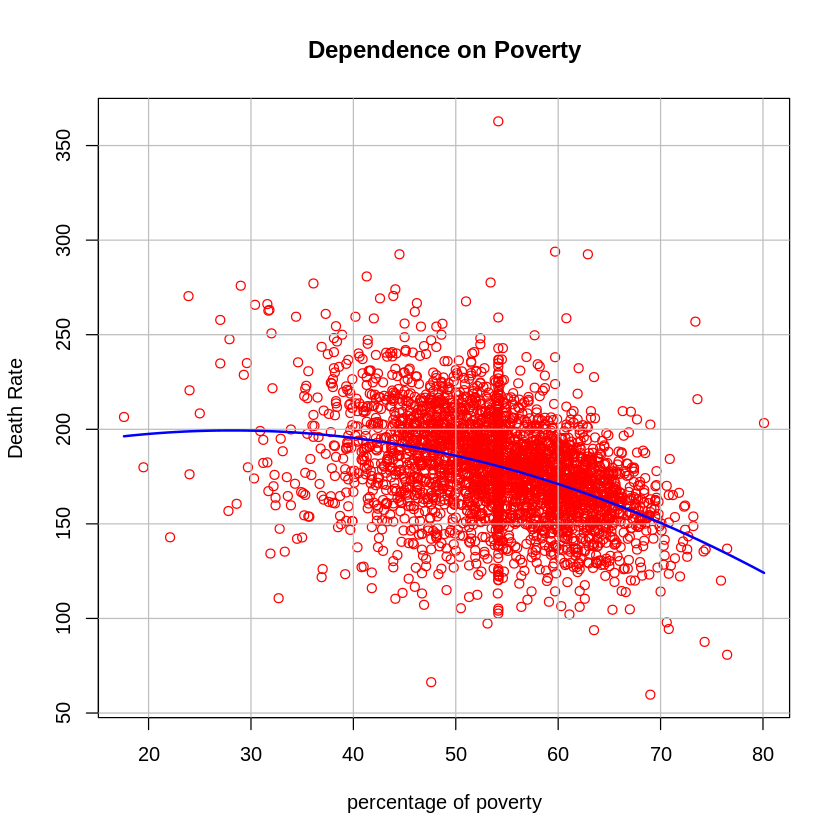

In [ ]:
df_=df
plot(df_$PctEmployed16_Over, df_$TARGET_deathRate,
     main = "Dependence on Poverty",
     xlab = "percentage of poverty",
     ylab = "Death Rate",
     pch = 1,                  # Change the point shape to solid circles
     col = "red",              # Change the point color to blue          # Set the y-axis limit              # Remove default axes
)
grid(col = "gray", lty = 1)

fit <- lm(TARGET_deathRate ~ poly(PctEmployed16_Over, 2), data = df_)

# Generate predicted values
x_seq <- seq(min(df_$PctEmployed16_Over), max(df_$PctEmployed16_Over), length.out = 100)
y_pred <- predict(fit, newdata = data.frame(PctEmployed16_Over = x_seq))

# Add quadratic curve to the plot
lines(x_seq, y_pred, col = "blue", lwd = 2)

Getting started with assumptions of regression

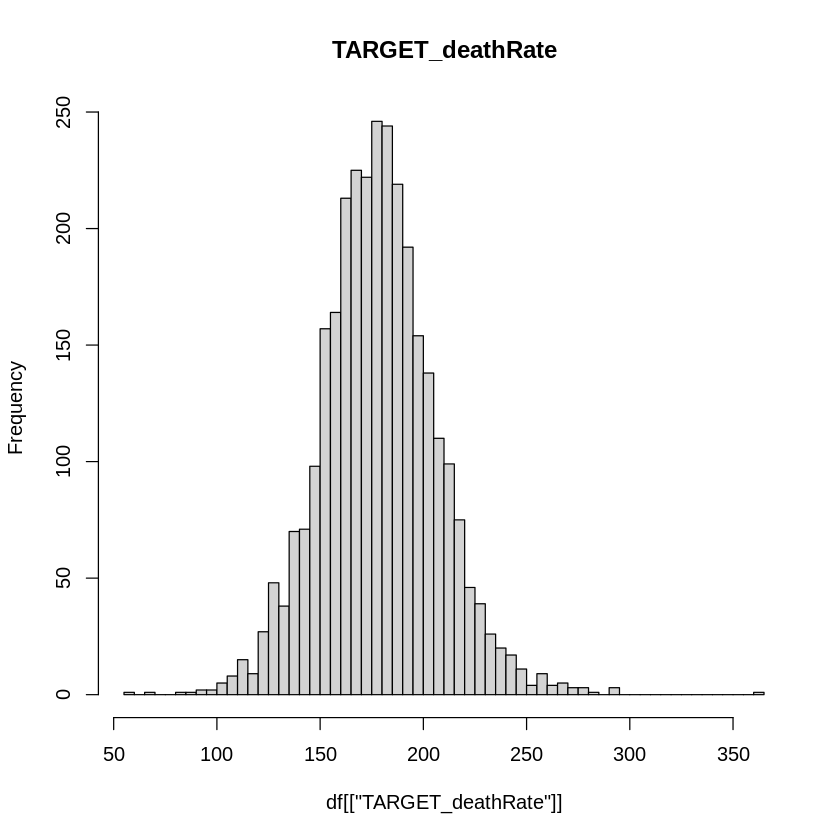

In [ ]:


#Normality symptom
hist(df[["TARGET_deathRate"]],breaks=100,main='TARGET_deathRate')


In [ ]:
#symptoms look like case of normality
#diagonostic tests
#Null Hypothesis : given label data is normal(More Serious it is , hence try to contradict)
#Alternative Hypothesis : given data is not normal
#shapiro wilk and qq plot



	Shapiro-Wilk normality test

data:  check^(1/2)
W = 0.99218, p-value = 8.089e-12



	Shapiro-Wilk normality test

data:  check
W = 0.99034, p-value = 1.64e-13


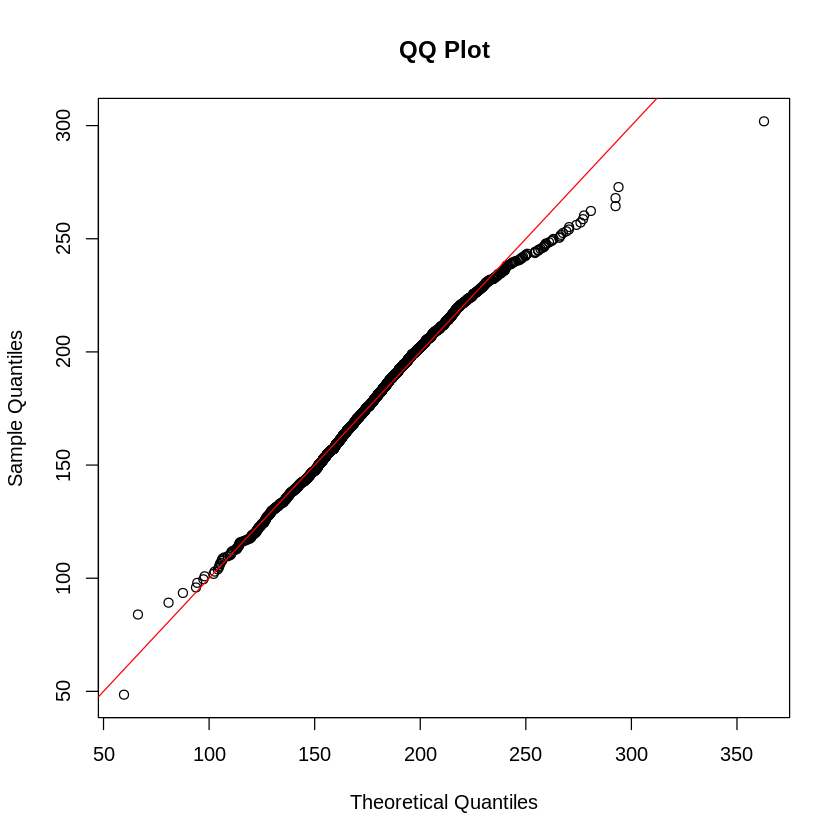

In [ ]:

check<-df[["TARGET_deathRate"]]
shapiro.test(check^(1/2))
n <- 100000
normal_dist <- rnorm(n, mean = mean(df$TARGET_deathRate), sd = sd(check))
qqplot(check, normal_dist, main = "QQ Plot", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
abline(a = 0, b = 1, col = "red")

shapiro.test(check)


	Shapiro-Wilk normality test

data:  df[["TARGET_deathRate"]]
W = 0.99034, p-value = 1.64e-13


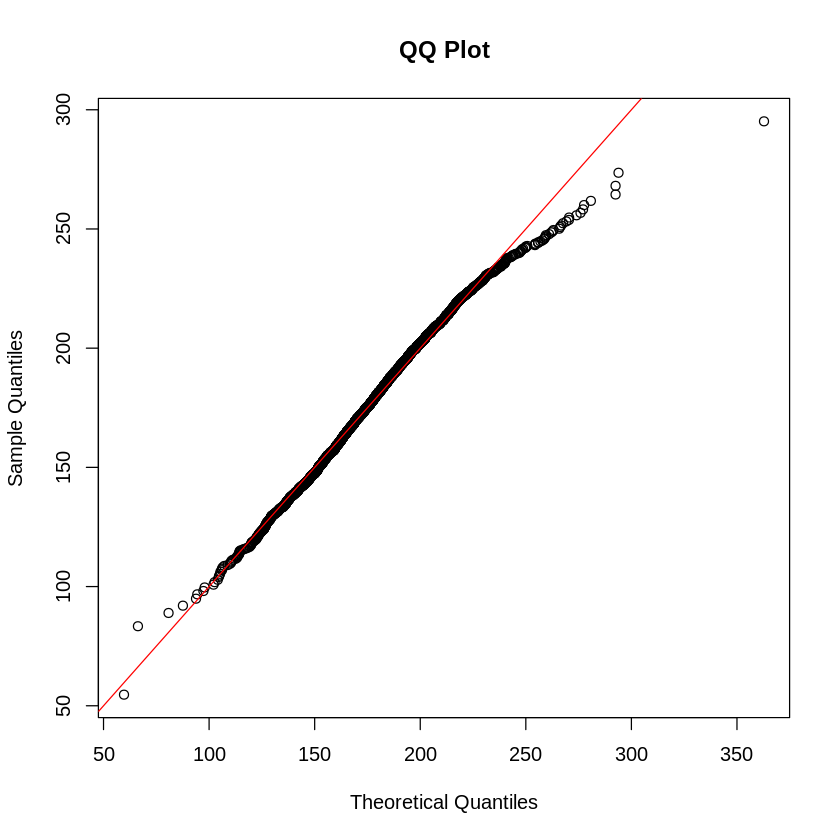

In [ ]:
n <- 100000
normal_dist <- rnorm(n, mean = mean(df$TARGET_deathRate), sd = sd(df$TARGET_deathRate))
qqplot(df$TARGET_deathRate, normal_dist, main = "QQ Plot", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
abline(a = 0, b = 1, col = "red")

shapiro.test(df[["TARGET_deathRate"]])


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




[1] 0.6666667

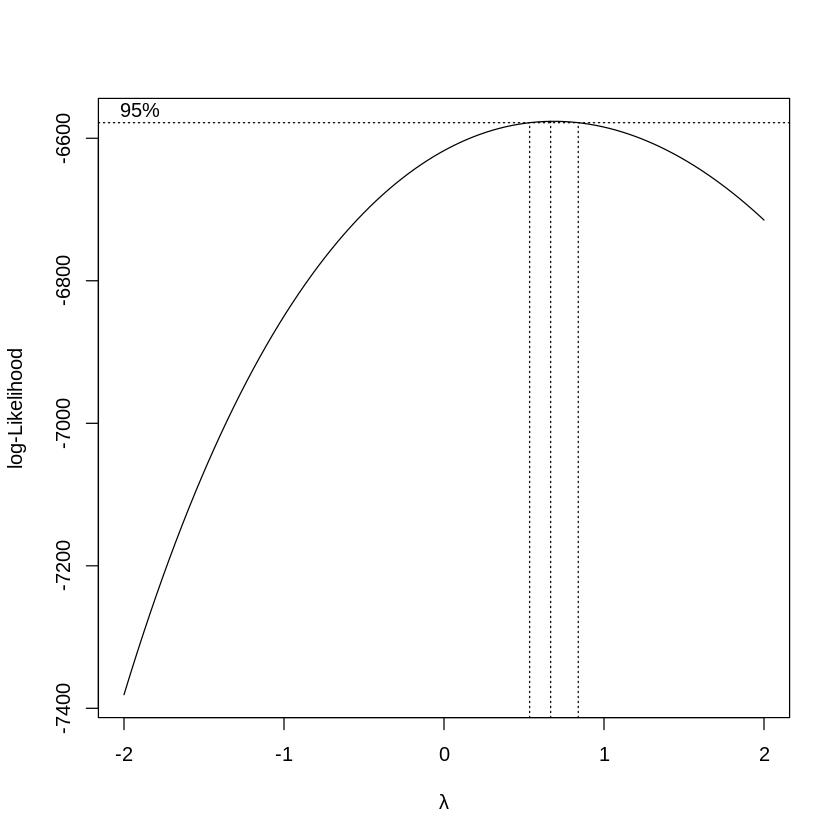

In [ ]:
library(MASS)
y = df$TARGET_deathRate

t = boxcox(y~1)
ind = which.max(t$y)
t$x[ind]

In [ ]:
#hence for explainabiltiy lets approximate the tranformation as y^1
#mean shifting of the labels
# u = mean(df[["TARGET_deathRate"]])
# df[["TARGET_deathRate"]] =df[["TARGET_deathRate"]] -u
# df[["Geography"]] = as.factor(df[["Geography"]])

#symptoms abhi baki hain



In [ ]:
# Install and load the lmtest package if you haven't already
install.packages("lmtest")
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




HETEROSKEDASTICITY

In [ ]:
# fit = lm(df$TARGET_deathRate ~PctEmpPrivCoverage,data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])
# summary(fit)
# plot(df[["PctEmpPrivCoverage"]],df[["TARGET_deathRate"]])
# plot(df[["PctEmpPrivCoverage"]],rstandard(fit))

for (i in 1:ncol(df)) {
if (i==3 || i==13 || i==9) next
print(colnames(df)[i])
fit = lm(df$TARGET_deathRate ~df[,i],data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])
# Perform the Goldfeld-Quandt test for heteroscedasticity
gold_test <- bptest(fit)
# Print the results
print(gold_test)

fit = lm(df$TARGET_deathRate ~  log(1e-10+df[,i]),data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])
# Perform the Goldfeld-Quandt test for heteroscedasticity
gold_test <- bptest(fit)
# Print the results
print(gold_test)
  # plot(df[,i],df[["TARGET_deathRate"]],main=colnames(df)[i])
}


# Perform the Goldfeld-Quandt test for heteroscedasticity
# gold_test <- gqtest(fit)

# # Print the results
# print(gold_test)


[1] "avgAnnCount"

	studentized Breusch-Pagan test

data:  fit
BP = 3.8218, df = 1, p-value = 0.05059


	studentized Breusch-Pagan test

data:  fit
BP = 139.92, df = 1, p-value < 2.2e-16

[1] "avgDeathsPerYear"

	studentized Breusch-Pagan test

data:  fit
BP = 16.497, df = 1, p-value = 4.873e-05


	studentized Breusch-Pagan test

data:  fit
BP = 121.37, df = 1, p-value < 2.2e-16

[1] "incidenceRate"

	studentized Breusch-Pagan test

data:  fit
BP = 3.5756, df = 1, p-value = 0.05863


	studentized Breusch-Pagan test

data:  fit
BP = 1.8782, df = 1, p-value = 0.1705

[1] "medIncome"

	studentized Breusch-Pagan test

data:  fit
BP = 35.555, df = 1, p-value = 2.48e-09


	studentized Breusch-Pagan test

data:  fit
BP = 53.425, df = 1, p-value = 2.687e-13

[1] "popEst2015"

	studentized Breusch-Pagan test

data:  fit
BP = 3.4047, df = 1, p-value = 0.06501


	studentized Breusch-Pagan test

data:  fit
BP = 152.13, df = 1, p-value < 2.2e-16

[1] "povertyPercent"

	studentized Breusch-Pagan tes

In [ ]:
fit = lm(df$TARGET_deathRate ~.,data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])
  # Perform the Goldfeld-Quandt test for heteroscedasticity
gold_test <- gqtest(fit)

# Print the results
print(gold_test)


fit = lm(df$TARGET_deathRate ~.,data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])
  # Perform the Goldfeld-Quandt test for heteroscedasticity
gold_test <- gqtest(fit)

# Print the results
print(gold_test)


	Goldfeld-Quandt test

data:  fit
GQ = 0.89162, df1 = 1494, df2 = 1493, p-value = 0.9866
alternative hypothesis: variance increases from segment 1 to 2


	Goldfeld-Quandt test

data:  fit
GQ = 0.89162, df1 = 1494, df2 = 1493, p-value = 0.9866
alternative hypothesis: variance increases from segment 1 to 2



In [ ]:
# fit = lm(df$TARGET_deathRate ~PctEmpPrivCoverage,data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])
# summary(fit)
# plot(df[["PctEmpPrivCoverage"]],df[["TARGET_deathRate"]])
# plot(df[["PctEmpPrivCoverage"]],rstandard(fit))

for (i in 1:ncol(df)) {
if (i==3 || i==13 || i==9) next
print(colnames(df)[i])
fit = lm( df$TARGET_deathRate ~  df[,i],data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])
# Perform the Goldfeld-Quandt test for heteroscedasticity
park_test <- bptest(fit)
# Print the results
print(park_test)
  # plot(df[,i],df[["TARGET_deathRate"]],main=colnames(df)[i])
}


# Perform the Goldfeld-Quandt test for heteroscedasticity
# gold_test <- gqtest(fit)

# # Print the results
# print(gold_test)


[1] "avgAnnCount"

	studentized Breusch-Pagan test

data:  fit
BP = 3.8218, df = 1, p-value = 0.05059

[1] "avgDeathsPerYear"

	studentized Breusch-Pagan test

data:  fit
BP = 16.497, df = 1, p-value = 4.873e-05

[1] "incidenceRate"

	studentized Breusch-Pagan test

data:  fit
BP = 3.5756, df = 1, p-value = 0.05863

[1] "medIncome"

	studentized Breusch-Pagan test

data:  fit
BP = 35.555, df = 1, p-value = 2.48e-09

[1] "popEst2015"

	studentized Breusch-Pagan test

data:  fit
BP = 3.4047, df = 1, p-value = 0.06501

[1] "povertyPercent"

	studentized Breusch-Pagan test

data:  fit
BP = 105.31, df = 1, p-value < 2.2e-16

[1] "studyPerCap"

	studentized Breusch-Pagan test

data:  fit
BP = 4.115, df = 1, p-value = 0.04251

[1] "MedianAge"

	studentized Breusch-Pagan test

data:  fit
BP = 0.043889, df = 1, p-value = 0.8341

[1] "MedianAgeMale"

	studentized Breusch-Pagan test

data:  fit
BP = 0.066309, df = 1, p-value = 0.7968

[1] "MedianAgeFemale"

	studentized Breusch-Pagan test

data: 

In [ ]:
fit = lm( df$TARGET_deathRate ~  df$avgDeathsPerYear,data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))])

wts <- 1/fitted(lm(abs(residuals(fit)) ~ fitted(fit)))^(1/2)
fit = lm( df$TARGET_deathRate ~  df$avgDeathsPerYear,data=df[ , !(colnames(df) %in% c("TARGET_deathRate",'Geography',"binnedInc"))],weights = wts)
# Perform the Goldfeld-Quandt test for heteroscedasticity
park_test <- bptest(fit)
# Print the results
print(park_test)


	studentized Breusch-Pagan test

data:  fit
BP = 105.42, df = 1, p-value < 2.2e-16



In [ ]:
tif= lm(formula = TARGET_deathRate ~ avgAnnCount + avgDeathsPerYear +
    incidenceRate + medIncome + popEst2015 + povertyPercent +
    MedianAgeMale + PercentMarried + PctNoHS18_24 + PctHS18_24 +
    PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctPrivateCoverage +
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone +
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate,
    data = df)
summary(tif)


Call:
lm(formula = TARGET_deathRate ~ avgAnnCount + avgDeathsPerYear + 
    incidenceRate + medIncome + popEst2015 + povertyPercent + 
    MedianAgeMale + PercentMarried + PctNoHS18_24 + PctHS18_24 + 
    PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctPrivateCoverage + 
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone + 
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.774 -10.947  -0.527  10.662 133.854 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.655e+02  1.404e+01  11.785  < 2e-16 ***
avgAnnCount            -3.246e-03  7.666e-04  -4.234 2.36e-05 ***
avgDeathsPerYear        1.776e-02  3.845e-03   4.619 4.02e-06 ***
incidenceRate           1.928e-01  7.125e-03  27.067  < 2e-16 ***
medIncome               1.153e-04  7.641e-05   1.509 0.131483    
popEst2015             -1.558e-05  5.374e-06  -2.900 0.00376

In [ ]:
tif_cubic=lm(formula = TARGET_deathRate ~ avgAnnCount + avgDeathsPerYear +
    incidenceRate + medIncome + popEst2015 + povertyPercent +
    MedianAgeMale + PercentMarried + PctNoHS18_24 + PctHS18_24 +
    PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctPrivateCoverage +
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone +
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate,
    data = df)
  summary(tif_cubic)


Call:
lm(formula = TARGET_deathRate ~ avgAnnCount + avgDeathsPerYear + 
    incidenceRate + medIncome + popEst2015 + povertyPercent + 
    MedianAgeMale + PercentMarried + PctNoHS18_24 + PctHS18_24 + 
    PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctPrivateCoverage + 
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone + 
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.774 -10.947  -0.527  10.662 133.854 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.655e+02  1.404e+01  11.785  < 2e-16 ***
avgAnnCount            -3.246e-03  7.666e-04  -4.234 2.36e-05 ***
avgDeathsPerYear        1.776e-02  3.845e-03   4.619 4.02e-06 ***
incidenceRate           1.928e-01  7.125e-03  27.067  < 2e-16 ***
medIncome               1.153e-04  7.641e-05   1.509 0.131483    
popEst2015             -1.558e-05  5.374e-06  -2.900 0.00376

In [ ]:
y  = log(df$TARGET_deathRate)
y  = y - mean(y)
tif_log <- lm(formula = y ~ log(avgAnnCount+1e-10) + log(avgDeathsPerYear+1e-10) +
               log(incidenceRate+1e-10) + log(medIncome+1e-10) + log(popEst2015+1e-10) + log(povertyPercent+1e-10) +
               log(MedianAgeMale+1e-10) + log(PercentMarried+1e-10) + log(PctNoHS18_24+1e-10) + log(PctHS18_24+1e-10) +
               log(PctHS25_Over+1e-10) + log(PctBachDeg25_Over+1e-10) + log(PctEmployed16_Over+1e-10) + log(PctPrivateCoverage+1e-10) +
               log(PctEmpPrivCoverage+1e-10) + log(PctPublicCoverage+1e-10) + log(PctPublicCoverageAlone+1e-10) +
               log(PctWhite+1e-10) + log(PctOtherRace+1e-10) + log(PctMarriedHouseholds+1e-10) + log(BirthRate+1e-10)+ avgAnnCount + avgDeathsPerYear +
    incidenceRate + medIncome + popEst2015 + povertyPercent +
    MedianAgeMale + PercentMarried + PctNoHS18_24 + PctHS18_24 +
    PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctPrivateCoverage +
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone +
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate,
               data = df)


# summary(tif_log)
# summary(fit_Store24)


step(tif_log,direction="backward",trace=1)

Start:  AIC=-16102.43
y ~ log(avgAnnCount + 1e-10) + log(avgDeathsPerYear + 1e-10) + 
    log(incidenceRate + 1e-10) + log(medIncome + 1e-10) + log(popEst2015 + 
    1e-10) + log(povertyPercent + 1e-10) + log(MedianAgeMale + 
    1e-10) + log(PercentMarried + 1e-10) + log(PctNoHS18_24 + 
    1e-10) + log(PctHS18_24 + 1e-10) + log(PctHS25_Over + 1e-10) + 
    log(PctBachDeg25_Over + 1e-10) + log(PctEmployed16_Over + 
    1e-10) + log(PctPrivateCoverage + 1e-10) + log(PctEmpPrivCoverage + 
    1e-10) + log(PctPublicCoverage + 1e-10) + log(PctPublicCoverageAlone + 
    1e-10) + log(PctWhite + 1e-10) + log(PctOtherRace + 1e-10) + 
    log(PctMarriedHouseholds + 1e-10) + log(BirthRate + 1e-10) + 
    avgAnnCount + avgDeathsPerYear + incidenceRate + medIncome + 
    popEst2015 + povertyPercent + MedianAgeMale + PercentMarried + 
    PctNoHS18_24 + PctHS18_24 + PctHS25_Over + PctBachDeg25_Over + 
    PctEmployed16_Over + PctPrivateCoverage + PctEmpPrivCoverage + 
    PctPublicCoverage + PctPu


Call:
lm(formula = y ~ log(avgAnnCount + 1e-10) + log(avgDeathsPerYear + 
    1e-10) + log(medIncome + 1e-10) + log(popEst2015 + 1e-10) + 
    log(MedianAgeMale + 1e-10) + log(PercentMarried + 1e-10) + 
    log(PctNoHS18_24 + 1e-10) + log(PctHS18_24 + 1e-10) + log(PctHS25_Over + 
    1e-10) + log(PctBachDeg25_Over + 1e-10) + log(PctEmployed16_Over + 
    1e-10) + log(PctPrivateCoverage + 1e-10) + log(PctEmpPrivCoverage + 
    1e-10) + log(PctPublicCoverage + 1e-10) + log(PctPublicCoverageAlone + 
    1e-10) + log(PctWhite + 1e-10) + log(PctMarriedHouseholds + 
    1e-10) + avgAnnCount + avgDeathsPerYear + incidenceRate + 
    medIncome + popEst2015 + povertyPercent + MedianAgeMale + 
    PercentMarried + PctHS18_24 + PctHS25_Over + PctPrivateCoverage + 
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone + 
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate, 
    data = df)

Coefficients:
                        (Intercept)             log(avgAnnCount + 1e-

In [ ]:
tif_=lm(formula = y ~ log(avgAnnCount + 1e-10) + log(avgDeathsPerYear +
    1e-10) + log(medIncome + 1e-10) + log(popEst2015 + 1e-10) +
    log(MedianAgeMale + 1e-10) + log(PercentMarried + 1e-10) +
    log(PctNoHS18_24 + 1e-10) + log(PctHS18_24 + 1e-10) + log(PctHS25_Over +
    1e-10) + log(PctBachDeg25_Over + 1e-10) + log(PctEmployed16_Over +
    1e-10) + log(PctPrivateCoverage + 1e-10) + log(PctEmpPrivCoverage +
    1e-10) + log(PctPublicCoverage + 1e-10) + log(PctPublicCoverageAlone +
    1e-10) + log(PctWhite + 1e-10) + log(PctMarriedHouseholds +
    1e-10) + avgAnnCount + avgDeathsPerYear + incidenceRate +
    medIncome + popEst2015 + povertyPercent + MedianAgeMale +
    PercentMarried + PctHS18_24 + PctHS25_Over + PctPrivateCoverage +
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone +
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate,
    data = df)
summary(tif_)


Call:
lm(formula = y ~ log(avgAnnCount + 1e-10) + log(avgDeathsPerYear + 
    1e-10) + log(medIncome + 1e-10) + log(popEst2015 + 1e-10) + 
    log(MedianAgeMale + 1e-10) + log(PercentMarried + 1e-10) + 
    log(PctNoHS18_24 + 1e-10) + log(PctHS18_24 + 1e-10) + log(PctHS25_Over + 
    1e-10) + log(PctBachDeg25_Over + 1e-10) + log(PctEmployed16_Over + 
    1e-10) + log(PctPrivateCoverage + 1e-10) + log(PctEmpPrivCoverage + 
    1e-10) + log(PctPublicCoverage + 1e-10) + log(PctPublicCoverageAlone + 
    1e-10) + log(PctWhite + 1e-10) + log(PctMarriedHouseholds + 
    1e-10) + avgAnnCount + avgDeathsPerYear + incidenceRate + 
    medIncome + popEst2015 + povertyPercent + MedianAgeMale + 
    PercentMarried + PctHS18_24 + PctHS25_Over + PctPrivateCoverage + 
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone + 
    PctWhite + PctOtherRace + PctMarriedHouseholds + BirthRate, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40472 -0.03995  0.00022

In [ ]:

tif_all_log_linear = lm(  y  ~ avgAnnCount + avgDeathsPerYear + incidenceRate + medIncome + popEst2015 + povertyPercent +
  studyPerCap + MedianAge + MedianAgeMale + MedianAgeFemale + AvgHouseholdSize + PercentMarried + PctNoHS18_24 + PctHS18_24 +
    PctBachDeg18_24 + PctHS25_Over + PctBachDeg25_Over + PctEmployed16_Over + PctUnemployed16_Over + PctPrivateCoverage +
      PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone + PctWhite + PctBlack + PctAsian + PctOtherRace +
  PctMarriedHouseholds + BirthRate + log(1e-10+avgAnnCount) +log(1e-10+ avgDeathsPerYear) + log(1e-10+incidenceRate) +log(1e-10+ medIncome) +log(1e-10+ popEst2015) +
     log(1e-10+povertyPercent) + log(1e-10+studyPerCap) + log(1e-10+MedianAge) +log(1e-10+ MedianAgeMale) +log(1e-10+ MedianAgeFemale) + log(1e-10+AvgHouseholdSize) + log(1e-10+PercentMarried) +
      log(1e-10+PctNoHS18_24) + log(1e-10+PctHS18_24) + log(1e-10+PctBachDeg18_24) + PctHS25_Over +log(1e-10+ PctBachDeg25_Over) +log(1e-10+ PctEmployed16_Over) +
      log(1e-10+PctUnemployed16_Over) + log(1e-10+PctPrivateCoverage) +log(1e-10+ PctEmpPrivCoverage) +log(1e-10+ PctPublicCoverage) + log(1e-10+PctPublicCoverageAlone) +
         log(1e-10+PctWhite) + log(1e-10+PctBlack) + log(1e-10+PctAsian) + log(1e-10+PctOtherRace) + log(1e-10+PctMarriedHouseholds) + log(1e-10+BirthRate)+sqrt(avgAnnCount),
				data= df)

# summary(fit_Store24)

step(tif_all_log_linear,direction="backward",trace=1)

Start:  AIC=-16500.53
y ~ avgAnnCount + avgDeathsPerYear + incidenceRate + medIncome + 
    popEst2015 + povertyPercent + studyPerCap + MedianAge + MedianAgeMale + 
    MedianAgeFemale + AvgHouseholdSize + PercentMarried + PctNoHS18_24 + 
    PctHS18_24 + PctBachDeg18_24 + PctHS25_Over + PctBachDeg25_Over + 
    PctEmployed16_Over + PctUnemployed16_Over + PctPrivateCoverage + 
    PctEmpPrivCoverage + PctPublicCoverage + PctPublicCoverageAlone + 
    PctWhite + PctBlack + PctAsian + PctOtherRace + PctMarriedHouseholds + 
    BirthRate + log(1e-10 + avgAnnCount) + log(1e-10 + avgDeathsPerYear) + 
    log(1e-10 + incidenceRate) + log(1e-10 + medIncome) + log(1e-10 + 
    popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 + studyPerCap) + 
    log(1e-10 + MedianAge) + log(1e-10 + MedianAgeMale) + log(1e-10 + 
    MedianAgeFemale) + log(1e-10 + AvgHouseholdSize) + log(1e-10 + 
    PercentMarried) + log(1e-10 + PctNoHS18_24) + log(1e-10 + 
    PctHS18_24) + log(1e-10 + PctBachDeg18_24) +


Call:
lm(formula = y ~ avgAnnCount + avgDeathsPerYear + incidenceRate + 
    popEst2015 + povertyPercent + MedianAgeMale + MedianAgeFemale + 
    AvgHouseholdSize + PercentMarried + PctHS18_24 + PctEmployed16_Over + 
    PctPrivateCoverage + PctPublicCoverage + PctPublicCoverageAlone + 
    PctBlack + PctAsian + PctOtherRace + PctMarriedHouseholds + 
    BirthRate + log(1e-10 + avgAnnCount) + log(1e-10 + avgDeathsPerYear) + 
    log(1e-10 + medIncome) + log(1e-10 + popEst2015) + log(1e-10 + 
    studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) + 
    log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) + 
    log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) + 
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) + 
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds) + sqrt(avgAnnCount), data = df)

Coefficients:
  

In [ ]:
# y  = log(df$TARGET_deathRate+1)

print(max(df$TARGET_deathRate))
print(min(df$TARGET_deathRate))

[1] 362.8
[1] 59.7


In [ ]:
z=lm(formula = y ~ avgAnnCount + avgDeathsPerYear + incidenceRate +
    medIncome + popEst2015 + povertyPercent + MedianAgeMale +
    MedianAgeFemale + AvgHouseholdSize + PercentMarried + PctHS18_24 +
    PctEmployed16_Over + PctPrivateCoverage + PctPublicCoverage +
    PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
    PctMarriedHouseholds + BirthRate + log(1e-10 + avgAnnCount) +
    log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
    log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
    studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) +
    log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
    log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
    log(1e-10 + PctMarriedHouseholds), data = df)

summary(z)


Call:
lm(formula = y ~ avgAnnCount + avgDeathsPerYear + incidenceRate + 
    medIncome + popEst2015 + povertyPercent + MedianAgeMale + 
    MedianAgeFemale + AvgHouseholdSize + PercentMarried + PctHS18_24 + 
    PctEmployed16_Over + PctPrivateCoverage + PctPublicCoverage + 
    PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace + 
    PctMarriedHouseholds + BirthRate + log(1e-10 + avgAnnCount) + 
    log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) + 
    log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 + 
    studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) + 
    log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) + 
    log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) + 
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) + 
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds), d

In [ ]:
 Y =  log(df$TARGET_deathRate) - mean(log(df$TARGET_deathRate))
z=lm(formula = log(TARGET_deathRate) ~  incidenceRate +
    MedianAgeFemale +
    PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
    BirthRate + log(1e-10 + avgAnnCount) +
    log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
    log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
    studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) +
    log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
    log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
    log(1e-10 + PctMarriedHouseholds)+binnedInc , data = df)

summary(z)




Call:
lm(formula = log(TARGET_deathRate) ~ incidenceRate + MedianAgeFemale + 
    PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace + 
    BirthRate + log(1e-10 + avgAnnCount) + log(1e-10 + avgDeathsPerYear) + 
    log(1e-10 + medIncome) + log(1e-10 + popEst2015) + log(1e-10 + 
    povertyPercent) + log(1e-10 + studyPerCap) + log(1e-10 + 
    MedianAgeMale) + log(1e-10 + AvgHouseholdSize) + log(1e-10 + 
    PercentMarried) + log(1e-10 + PctNoHS18_24) + log(1e-10 + 
    PctHS18_24) + log(1e-10 + PctBachDeg18_24) + log(1e-10 + 
    PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) + log(1e-10 + 
    PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds) + binnedInc, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43525 -0.03755  0.00005  0.03855  0.73861 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(I

In [ ]:
tif_log <- lm(formula = TARGET_deathRate ~ log(avgAnnCount+1e-10) + log(avgDeathsPerYear+1e-10) +
               log(incidenceRate+1e-10) + log(medIncome+1e-10) + log(popEst2015+1e-10) + log(povertyPercent+1e-10) +
               log(MedianAgeMale+1e-10) + log(PercentMarried+1e-10) + log(PctNoHS18_24+1e-10) + log(PctHS18_24+1e-10) +
               log(PctHS25_Over+1e-10) + log(PctBachDeg25_Over+1e-10) + log(PctEmployed16_Over+1e-10) + log(PctPrivateCoverage+1e-10) +
               log(PctEmpPrivCoverage+1e-10) + log(PctPublicCoverage+1e-10) + log(PctPublicCoverageAlone+1e-10) +
               log(PctWhite+1e-10) + log(PctOtherRace+1e-10) + log(PctMarriedHouseholds+1e-10) + log(BirthRate+1e-10),
               data = df)
summary(tif_log)


Call:
lm(formula = TARGET_deathRate ~ log(avgAnnCount + 1e-10) + log(avgDeathsPerYear + 
    1e-10) + log(incidenceRate + 1e-10) + log(medIncome + 1e-10) + 
    log(popEst2015 + 1e-10) + log(povertyPercent + 1e-10) + log(MedianAgeMale + 
    1e-10) + log(PercentMarried + 1e-10) + log(PctNoHS18_24 + 
    1e-10) + log(PctHS18_24 + 1e-10) + log(PctHS25_Over + 1e-10) + 
    log(PctBachDeg25_Over + 1e-10) + log(PctEmployed16_Over + 
    1e-10) + log(PctPrivateCoverage + 1e-10) + log(PctEmpPrivCoverage + 
    1e-10) + log(PctPublicCoverage + 1e-10) + log(PctPublicCoverageAlone + 
    1e-10) + log(PctWhite + 1e-10) + log(PctOtherRace + 1e-10) + 
    log(PctMarriedHouseholds + 1e-10) + log(BirthRate + 1e-10), 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.984  -7.939  -0.605   7.522 128.528 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         1101.78398   55.33890  19.910  < 2e-16 ***
log(a

In [ ]:
# #structure of data
# str(df)

# lm(y~age + factor(type))

In [ ]:
# ptr <- 0
# map <- list()
# for (i in 1:nrow(df)) {
#   df$Geography[i] = ptr
#   ptr=ptr+1
# }
# df$Geography= as.integer(df$Geography)


In [ ]:
# df$binnedInc = as.factor(df$binnedInc)
# str(df)

In [ ]:
# # df[["binnedInc"]][1]

# df$l = df$avgAnnCount
# df$u = df$avgAnnCount
# df$mean = df$avgAnnCount
# df$range = df$avgAnnCount

# for (i in 1:nrow(df)) {
# a=strsplit(df[["binnedInc"]][i]," ")[[1]]
# a = as.list(a)
# df$l[i]=as.numeric(substring(a[1],2,nchar(a[1]) - 1))
# df$u[i]=as.numeric(substring(a[2],1,nchar(a[2]) - 1))
# df$mean[i] = (df$l[i] + df$u[i])/2
# df$range[i] = (df$u[i] - df$l[i])
# }

In [ ]:
# df$lower[1] = 1

# print(df$lower[1])f
# print(df$avgAnnCount[1])
# print(df$mean[1])



In [ ]:
# # Input string
# my_string <- "Hello world"

# # Split the string by space
# split_string <- strsplit(my_string, " ")[[1]]

# # Convert the result into a list of strings
# list_of_strings <- as.list(split_string)

# # Print the list of strings
# print(list_of_strings)


In [ ]:
 Y =  log(df$TARGET_deathRate) - mean(log(df$TARGET_deathRate))
z=lm(formula = Y ~  incidenceRate +
    MedianAgeFemale +
    PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
    BirthRate + log(1e-10 + avgAnnCount) +
    log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
    log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
    studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) +
    log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
    log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
    log(1e-10 + PctMarriedHouseholds) , data = df,weights=wts)

summary(z)


Call:
lm(formula = Y ~ incidenceRate + MedianAgeFemale + PctPublicCoverageAlone + 
    PctBlack + PctAsian + PctOtherRace + BirthRate + log(1e-10 + 
    avgAnnCount) + log(1e-10 + avgDeathsPerYear) + log(1e-10 + 
    medIncome) + log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + 
    log(1e-10 + studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + 
    AvgHouseholdSize) + log(1e-10 + PercentMarried) + log(1e-10 + 
    PctNoHS18_24) + log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) + 
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) + 
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds), data = df, weights = wts)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-0.20531 -0.01727  0.00028  0.01809  0.34413 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)    

In [ ]:
z


Call:
lm(formula = Y ~ incidenceRate + MedianAgeFemale + PctPublicCoverageAlone + 
    PctBlack + PctAsian + PctOtherRace + BirthRate + log(1e-10 + 
    avgAnnCount) + log(1e-10 + avgDeathsPerYear) + log(1e-10 + 
    medIncome) + log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + 
    log(1e-10 + studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + 
    AvgHouseholdSize) + log(1e-10 + PercentMarried) + log(1e-10 + 
    PctNoHS18_24) + log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) + 
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) + 
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds), data = df, weights = wts)

Coefficients:
                      (Intercept)                      incidenceRate  
                        5.6465860                          0.0004139  
                  MedianAgeFemale             PctPublicCoverage

In [ ]:
gold_test = gqtest(z)
print(gold_test)


	Goldfeld-Quandt test

data:  z
GQ = 0.89413, df1 = 1496, df2 = 1495, p-value = 0.9847
alternative hypothesis: variance increases from segment 1 to 2



Hetero correction


	studentized Breusch-Pagan test

data:  z
BP = 588.81, df = 26, p-value < 2.2e-16




Call:
lm(formula = Y ~ incidenceRate + MedianAgeFemale + PctPublicCoverageAlone + 
    PctBlack + PctAsian + PctOtherRace + BirthRate + log(1e-10 + 
    avgAnnCount) + log(1e-10 + avgDeathsPerYear) + log(1e-10 + 
    medIncome) + log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + 
    log(1e-10 + studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + 
    AvgHouseholdSize) + log(1e-10 + PercentMarried) + log(1e-10 + 
    PctNoHS18_24) + log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) + 
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) + 
    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds), data = df, weights = wts)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.04252 -0.07871 -0.00097  0.08124  1.38158 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)    

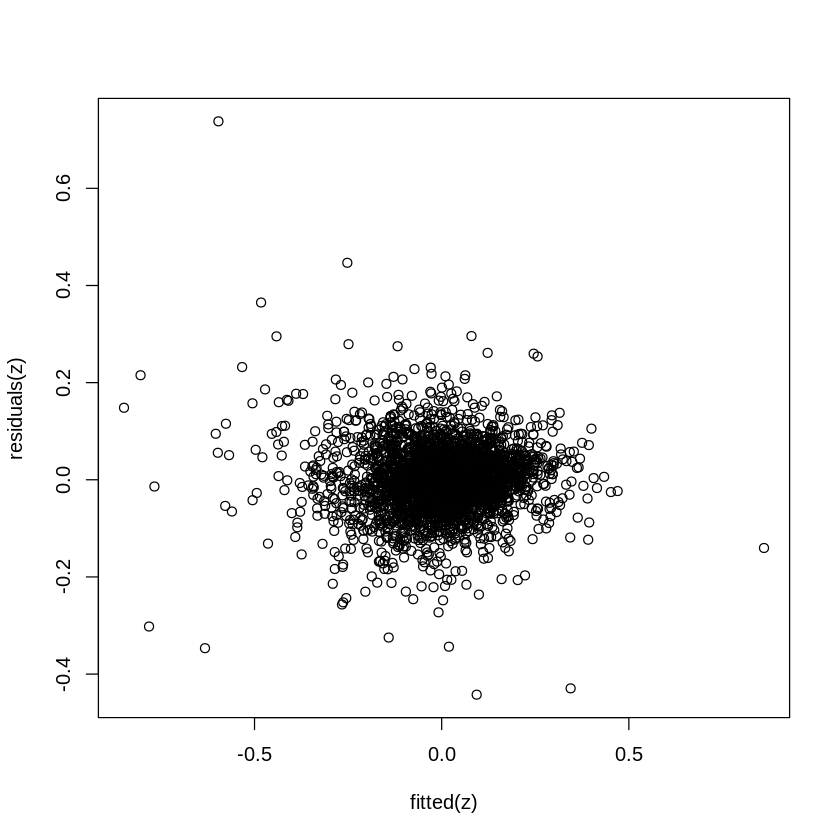

In [ ]:
# Fit the initial linear regression model
z <- lm(formula = Y ~ incidenceRate +
                MedianAgeFemale +
                PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
                BirthRate + log(1e-10 + avgAnnCount) +
                log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
                log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
                studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) +
                log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
                log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
                log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
                log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
                log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
                log(1e-10 + PctMarriedHouseholds), data = df)

wts <- 1/fitted(lm(abs(residuals(z)) ~ fitted(z)))^(1/2)
# Calculate weights
pagan = bptest(z)
print(pagan)

plot(fitted(z),residuals(z))
# gold = gqtest(z) still says it is not heterscedastic
# print(gold)
weights <- 1 / fitted(z)^(2.9)

# Fit the weighted model
wls_z <- lm(formula = Y ~ incidenceRate +
                    MedianAgeFemale +
                    PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
                    BirthRate + log(1e-10 + avgAnnCount) +
                    log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
                    log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
                    studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) +
                    log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
                    log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
                    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
                    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
                    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
                    log(1e-10 + PctMarriedHouseholds), data = df, weights = wts)

# Summary of the WLS model
summary(wls_z)


In [ ]:
predicted = predict (wls_z, newdata = df)
length(fitted(wls_z))
length(Y)
length(predicted)

[1] 3046

[1] 3047

[1] 3047

## Multicolinearity

In [ ]:
# test for multicollinearity for the model wls_z

library(regclass)
library(ridge)

# Calculate the VIF for the model
# print(VIF(wls_z))
vif_values <- VIF(wls_z)

# Check for multicollinearity
print("\n\nVIF values greater than 5:")
high_vif <- vif_values[vif_values > 5]
print(high_vif)

ERROR: Error in library(regclass): there is no package called ‘regclass’


In [ ]:
predicted = predict (wls_z, newdata = df)
compare = cbind (actual= log(df$TARGET_deathRate) - mean(log(df$TARGET_deathRate)), predicted)
compare


In [ ]:
mean (apply(compare, 1, min)/apply(compare, 1, max))

plot(wls_z$residuals,ylab="residuals",xlab="Order",col=2,pch=16)
abline(0,0,col="blue",lwd=2)

In [ ]:

plot(y=predict(wls_z, newdata = df) ,x=Y,ylab="fitted values",
	xlab="observed values",col=2,pch=16)
abline(0,1)

In [ ]:
# remedies
# linear ridge for wls_z

# Fit the linearridge regression model
wls_z_fitridge = linearRidge(Y ~ incidenceRate +
                    MedianAgeFemale +
                    PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
                    BirthRate + log(1e-10 + avgAnnCount) +
                    log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
                    log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
                    studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) +
                    log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
                    log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
                    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
                    log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
                    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
                    log(1e-10 + PctMarriedHouseholds), data = df, weights = wts)

# Summary of the WLS model
summary(wls_z_fitridge)

In [ ]:
predicted = predict (wls_z_fitridge, newdata = df)
compare = cbind (actual= log(df$TARGET_deathRate) - mean(log(df$TARGET_deathRate)), predicted)
compare


In [ ]:
plot(y=predict(wls_z_fitridge, newdata = df) ,x=Y,ylab="fitted values",
	xlab="observed values",col=2,pch=16)
abline(0,1)

In [ ]:
# Fit the initial linear regression model
z <- lm(formula = Y ~ incidenceRate +
                MedianAgeFemale +
                PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
                BirthRate + ( avgAnnCount) +
                ( avgDeathsPerYear) + ( medIncome) +
                ( popEst2015) + ( povertyPercent) + (
                studyPerCap) + ( MedianAgeMale) + ( AvgHouseholdSize) +
                ( PercentMarried) + ( PctNoHS18_24) +
                ( PctHS18_24) + ( PctBachDeg18_24) +
                ( PctBachDeg25_Over) + ( PctEmployed16_Over) +
                ( PctUnemployed16_Over) + ( PctPrivateCoverage) +
                ( PctPublicCoverage) + ( PctWhite) +
                ( PctMarriedHouseholds), data = df)

wts <- 1/fitted(lm(abs(residuals(z)) ~ fitted(z)))^(1/2)
# Calculate weights
pagan = bptest(z)

In [ ]:
# Fit the initial linear regression model
z <- lm(formula = Y ~ incidenceRate +
                MedianAgeFemale +
                PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
                BirthRate + log(1e-10 + avgAnnCount) +
                log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
                log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
                studyPerCap) + log(1e-10 + MedianAgeMale) + log(1e-10 + AvgHouseholdSize) +
                log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
                log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
                log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
                log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
                log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
                log(1e-10 + PctMarriedHouseholds), data = df)

wts <- 1/fitted(lm(abs(residuals(z)) ~ fitted(z)))^(1/2)
# Calculate weights
pagan = bptest(z)
print(pagan)


In [ ]:
install.packages("lmtest")
library(lmtest)

install.packages("car")
library(car)

In [ ]:
# Fit the initial linear regression model
z <- lm(formula = TARGET_deathRate ~ avgDeathsPerYear, data = df)

# Calculate weights
pagan = bptest(z)
print(pagan)


z <- lm(formula = TARGET_deathRate ~ log(avgDeathsPerYear), data = df)

pagan = bptest(z)
print(pagan)

In [ ]:
if(!require('stats')) {
  install.packages('stats')
  library('stats')
}




In [ ]:
require(graphics)

plot(TARGET_deathRate ~ avgDeathsPerYear , data = df )
bartlett.test(TARGET_deathRate ~ avgDeathsPerYear, data = df)

In [ ]:
plot(df$avgDeathsPerYear,df$TARGET_deathRate)
plot(log(df$avgDeathsPerYear),df$TARGET_deathRate)

plot(sqrt(df$avgDeathsPerYear),df$TARGET_deathRate)

plot((df$avgDeathsPerYear)^3,df$TARGET_deathRate)

In [ ]:
plot(df$AvgHouseholdSize,df$TARGET_deathRate)
plot(log(df$AvgHouseholdSize),df$TARGET_deathRate)


plot(df$PctHS18_24,df$TARGET_deathRate)
plot(log(df$PctHS18_24),df$TARGET_deathRate)



plot(df$PctUnemployed16_Over,df$TARGET_deathRate)
plot(log(df$PctUnemployed16_Over),df$TARGET_deathRate)



In [ ]:



# plot(df$PctUnemployed16_Over,df$TARGET_deathRate)


# plot(log(df$PctUnemployed16_Over),df$TARGET_deathRate)


In [ ]:
library(psych)
fa <- fa(df, nfactors=2, rotate="none", fm="pa")

In [ ]:
# Load the 'psych' package
# install.packages("psych")
# Load the 'psych' package
library(psych)

# Assuming 'df' is your dataframe containing the variables you mentioned

# Specify the variables for factor analysis
variables <- c(
  "avgAnnCount", "avgDeathsPerYear", "TARGET_deathRate", "incidenceRate",
  "medIncome", "popEst2015", "povertyPercent", "studyPerCap", "binnedInc",
  "MedianAge", "MedianAgeMale", "MedianAgeFemale", "Geography",
  "AvgHouseholdSize", "PercentMarried", "PctNoHS18_24", "PctHS18_24",
  "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over",
  "PctUnemployed16_Over", "PctPrivateCoverage", "PctEmpPrivCoverage",
  "PctPublicCoverage", "PctPublicCoverageAlone", "PctWhite", "PctBlack",
  "PctAsian", "PctOtherRace", "PctMarriedHouseholds", "BirthRate"
)


# Perform factor analysis
fa_result <- fa(df[,variables], nfactors = 20, rotate = "none", fm = "pa")

# Plot the scree plot
# scree(fa_result)


In [ ]:
# Load the 'psych' package
if (!require("psych")) install.packages("psych")
# Load the 'psych' package
library(psych)

# Assuming 'df' is your dataframe containing the variables you mentioned

# Specify the variables for factor analysis
variables <- c(
  "avgAnnCount", "avgDeathsPerYear", "TARGET_deathRate", "incidenceRate",
  "medIncome", "popEst2015", "povertyPercent", "studyPerCap",
  "MedianAge", "MedianAgeMale", "MedianAgeFemale",
  "AvgHouseholdSize", "PercentMarried", "PctNoHS18_24", "PctHS18_24",
  "PctBachDeg18_24", "PctHS25_Over", "PctBachDeg25_Over", "PctEmployed16_Over",
  "PctUnemployed16_Over", "PctPrivateCoverage", "PctEmpPrivCoverage",
  "PctPublicCoverage", "PctPublicCoverageAlone", "PctWhite", "PctBlack",
  "PctAsian", "PctOtherRace", "PctMarriedHouseholds", "BirthRate"
)

covariances <- cov(df[,variables])
correlations <- cov2cor(covariances)
# correlations

fa.parallel(correlations, n.obs=nrow(df), fa="both", n.iter=100,
            main="Scree plots with parallel analysis")

fa_result <- fa(correlations, nfactors =6,max.iter = 500, rotate = "none", fm = "pa")
print(fa_result)


In [ ]:
variables2 <- c("PctAsian", "PctOtherRace", "BirthRate", "avgAnnCount", "avgDeathsPerYear",
  "medIncome", "popEst2015", "povertyPercent", "studyPerCap", "MedianAgeMale",
  "AvgHouseholdSize", "PercentMarried", "PctNoHS18_24", "PctHS18_24",
  "PctBachDeg18_24", "PctBachDeg25_Over", "PctEmployed16_Over",
  "PctUnemployed16_Over", "PctPrivateCoverage", "PctPublicCoverage",
  "PctWhite", "PctMarriedHouseholds","TARGET_deathRate")

Clustering

In [ ]:
head(df)

wineTrain <- df[, variables]

set.seed(278613)
wineK3 <- kmeans(x=wineTrain, centers=5)

In [ ]:
# install.packages("useful")
library(useful)
plot(wineK3, data=wineTrain)

In [ ]:
plot(wineK3, data=df[,variables2], class="TARGET_deathRate")

In [ ]:
# Load required libraries
library(ggplot2) # for visualization
library(dplyr)   # for data manipulation

# Assuming your data frame is named df
variables2 <- c("PctAsian", "PctOtherRace", "BirthRate", "avgAnnCount", "avgDeathsPerYear",
                "medIncome", "popEst2015", "povertyPercent", "studyPerCap", "MedianAgeMale",
                "AvgHouseholdSize", "PercentMarried", "PctNoHS18_24", "PctHS18_24",
                "PctBachDeg18_24", "PctBachDeg25_Over", "PctEmployed16_Over",
                "PctUnemployed16_Over", "PctPrivateCoverage", "PctPublicCoverage",
                "PctWhite", "PctMarriedHouseholds")

# Select the variables for clustering
wineTrain <- log(df[, variables2]+1)

# Perform KMeans clustering
set.seed(123) # for reproducibility
k <- 5  # Number of clusters
wineKmeans <- kmeans(wineTrain, centers = k, nstart = 25)

# Analyzing clustering results
# Assign cluster labels to original dataframe
df$cluster <- as.factor(wineKmeans$cluster)

# Summary of cluster sizes
cluster_summary <- table(df$cluster)
print(cluster_summary)

# Visualize clustering results
# Assuming you want to visualize two dimensions
# You can choose any two variables from your data for visualization
ggplot(df, aes(x = povertyPercent, y = PctWhite, color = cluster)) +
  geom_point() +
  labs(x = "Percentage of Asian Population",
       y = "Median Income",
       color = "Cluster") +
  theme_minimal()


In [ ]:
# Initialize vector to store within-cluster sum of squares
wcss <- vector()

# Determine WCSS for different number of clusters
for (i in 1:10) {
  wineKmeans <- kmeans(wineTrain, centers = i, nstart = 25)
  wcss[i] <- wineKmeans$tot.withinss
}

# Plot the elbow curve
elbow_plot <- data.frame(Clusters = 1:10, WCSS = wcss) %>%
  ggplot(aes(x = Clusters, y = WCSS)) +
  geom_line() +
  geom_point() +
  labs(x = "Number of Clusters", y = "Within-Cluster Sum of Squares (WCSS)") +
  theme_minimal()

print(elbow_plot)

In [ ]:
# Assuming your data is loaded into a dataframe named 'df'

# Install and load required packages (if not already installed)
if (!require("stats")) install.packages("stats")
library(stats)

# Select the desired variables for clustering
variables2 <- c("PctAsian", "PctOtherRace", "BirthRate", "avgAnnCount", "avgDeathsPerYear",
                  "medIncome", "popEst2015", "povertyPercent", "studyPerCap", "MedianAgeMale",
                  "AvgHouseholdSize", "PercentMarried", "PctNoHS18_24", "PctHS18_24",
                  "PctBachDeg18_24", "PctBachDeg25_Over", "PctEmployed16_Over",
                  "PctUnemployed16_Over", "PctPrivateCoverage", "PctPublicCoverage",
                  "PctWhite", "PctMarriedHouseholds")

# Check for missing values (consider handling them if necessary)
summary(df[variables2])  # Check for missing values

# Standardize or normalize the data (optional but recommended)
# This can improve the performance of K-means, especially with variables of different scales
df_scaled <- scale(df[variables2])

# Determine the optimal number of clusters (consider using elbow method or silhouette analysis)
# Here's an example using the elbow method:
wss <- vector(length = 10)  # Pre-allocate for efficiency
for (i in 2:10) {
  kmeans_fit <- kmeans(df_scaled, centers = i, nstart = 20)  # Run K-means with 20 random centroids
  wss[i] <- sum(kmeans_fit$withinss)
}

plot(2:10, wss, type = "b", xlab = "Number of Clusters", ylab = "Within-cluster Sum of Squares")
# Analyze the plot to identify the "elbow" where the decrease in WSS plateaus

# Choose the number of clusters based on your analysis (e.g., 3 clusters)
n_clusters <- 3

# Apply K-means clustering with the chosen number of clusters
kmeans_fit <- kmeans(df_scaled, centers = n_clusters, nstart = 20)

# Add the cluster labels to your original data for further analysis
df$cluster <- kmeans_fit$cluster

# Explore the clusters:
summary(df[variables2] %>% group_by(cluster))  # Summarize cluster characteristics
# Visualize the clusters using techniques like scatter plots or PCA (depending on data dimensionality)

# (Optional) Evaluate the clustering results using metrics like silhouette analysis

# Remember to interpret the clusters based on the variables used and your domain knowledge.


In [ ]:
# Load necessary libraries
library(cluster)

# Prepare data (replace df with your dataframe)
# Remove the dependent variable (TARGET_deathRate) for clustering
data_for_clustering <- df[, -grep("TARGET_deathRate", names(df))]

# Calculate Within-Cluster Sum of Squares (WCSS) for different number of clusters (k)
wcss <- numeric(length = 10)  # Set the maximum number of clusters to 10
for (i in 1:10) {
  kmeans_model <- kmeans(data_for_clustering, centers = i, nstart = 25)  # Perform k-means clustering
  wcss[i] <- kmeans_model$tot.withinss  # Store the within-cluster sum of squares
}

# Plot the elbow method graph
plot(1:10, wcss, type = "b", pch = 19, frame = FALSE, xlab = "Number of Clusters (k)",
     ylab = "Within-Cluster Sum of Squares (WCSS)", main = "Elbow Method for Optimal k")

# Determine the optimal number of clusters using the elbow method
elbow_point <- which(diff(wcss) == max(diff(wcss))) + 1
abline(v = elbow_point, col = "red", lty = 2)
cat("Optimal number of clusters (Elbow method):", elbow_point, "\n")


In [ ]:
# Perform k-means clustering with the optimal number of clusters
optimal_k <- elbow_point  # Use the optimal number of clusters obtained from the elbow method
optimal_k <- 4
kmeans_model <- kmeans(data_for_clustering, centers = optimal_k, nstart = 25)  # Perform k-means clustering

# Print the cluster centers
print(kmeans_model$centers)

# Add cluster assignments to the original dataframe
df$cluster <- kmeans_model$cluster

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(cluster)

# Prepare data (replace df with your dataframe)
# Remove the dependent variable (TARGET_deathRate) for clustering
data_for_clustering <- df[, -grep("TARGET_deathRate", names(df))]

# Perform PCA for dimensionality reduction
pca_result <- prcomp(data_for_clustering, scale. = TRUE)

# Extract the first two principal components
pca_data <- as.data.frame(pca_result$x[, 1:2])

# Add cluster assignments to the PCA data
pca_data$cluster <- kmeans_model$cluster

# Plot the clusters
ggplot(pca_data, aes(x = PC1, y = PC2, color = factor(cluster))) +
  geom_point(size = 3) +
  scale_color_discrete(name = "Cluster") +
  labs(x = "Principal Component 1", y = "Principal Component 2", title = "K-Means Clustering") +
  theme_minimal()


In [ ]:
df1 = df[, c("incidenceRate", "MedianAgeFemale", "PctPublicCoverageAlone", "PctBlack", "PctAsian", "PctOtherRace", "BirthRate")]
df2 = log(df[, c("avgAnnCount", "avgDeathsPerYear", "medIncome", "popEst2015", "povertyPercent", "studyPerCap", "MedianAgeMale", "AvgHouseholdSize", "PercentMarried", "PctNoHS18_24", "PctHS18_24", "PctBachDeg18_24", "PctBachDeg25_Over", "PctEmployed16_Over", "PctUnemployed16_Over", "PctPrivateCoverage", "PctPublicCoverage", "PctWhite", "PctMarriedHouseholds")] + 1e-10)
# make a with the combination of the two dataframes
df_new = cbind(df1, df2)

# add the df$TARGET_deathRate to the dataframe
TARGET_deathRate = df$TARGET_deathRate
df_new = cbind(df_new, TARGET_deathRate)

df_new

In [ ]:
# apply PCA

# fit a model
fit <- lm(formula = TARGET_deathRate ~ ., data = df[ , !(colnames(df) %in% c("Geography","binnedInc","TARGET_deathRate"))])

summary(fit)
plot(fit)

# standardize the data
X <- model.matrix(fit)[,-1]
X_scaled <- scale(X)

# apply PCA
PCA_df <- prcomp(X_scaled, scale. = FALSE)

summary(PCA_df)

In [ ]:
# find the variance explained by each component
variance_explained <- PCA_df$sdev^2 / sum(PCA_df$sdev^2)
cumulative_variance <- cumsum(variance_explained)
num_components <- which.max(cumulative_variance > 0.90) # find the number of components that explain 90% of the variance # nolint

# Transform the data
X_transformed <- PCA_df$x[,1:num_components]

# fit a linear model
fit_pca_df <- lm(formula = TARGET_deathRate ~ X_transformed)

summary(fit_pca_df)
plot(fit_pca_df)

In [ ]:
# apply PCA

# fit a model
fit <- lm(formula = log(df_new$TARGET_deathRate) - mean(log(df_new$TARGET_deathRate)) ~ ., data = df_new[ , !(colnames(df_new) %in% c("TARGET_deathRate"))]) # nolint

summary(fit)
plot(fit)

# standardize the data
X <- model.matrix(fit)[,-1]
X_scaled <- scale(X)

# apply PCA
PCA_df_n <- prcomp(X_scaled, scale. = FALSE)

summary(PCA_df_n)

In [ ]:
# find the variance explained by each component
variance_explained <- PCA_df_n$sdev^2 / sum(PCA_df_n$sdev^2)
cumulative_variance <- cumsum(variance_explained)
num_components <- which.max(cumulative_variance > 0.90) # find the number of components that explain 90% of the variance # nolint

# Transform the data
X_transformed <- PCA_df_n$x[,1:num_components]

# fit a linear model
fit_pca_df_n <- lm(formula = log(df$TARGET_deathRate) - mean(log(df$TARGET_deathRate)) ~ X_transformed)

summary(fit_pca_df_n)
plot(fit_pca_df_n)

In [ ]:
# OUTLIERS FOR DATAFRAME df

# find the outliers for the dataframe
outliers <- boxplot.stats(df$TARGET_deathRate)$out

# find the number of outliers
num_outliers <- length(outliers)

# remove the outliers
df_no_outliers <- df[!(df$TARGET_deathRate %in% outliers),]



In [ ]:
# OUTLIERS FOR DATAFRAME df_new

# find the outliers for the dataframe
outliers <- boxplot.stats(df_new$TARGET_deathRate)$out

# find the number of outliers
num_outliers <- length(outliers)

# remove the outliers
df_new_no_outliers <- df_new[!(df_new$TARGET_deathRate %in% outliers),]

# number of rows in the dataframe
nrow(df_new_no_outliers)


publiccoveragealone and emppriv -72
black and white - 80
Popest , avgdeaths , avgAnnCount  - high collinearity but resolved after log


mediator median age.

cofounders  - unemployed -> employed and target


publiccoveragealone and emppriv -72 cofounders
PctWhite, PctBlack, PctAsian, PctOtherRace:



In [ ]:
z <- lm(formula = Y ~ incidenceRate
+ log(1e-10+MedianAgeFemale)
 + log(1e-10+MedianAgeMale)
+ PctPublicCoverageAlone
                # +PctBlack
                # + PctAsian + PctOtherRace
                +
                BirthRate + log(1e-10 + avgAnnCount) +
                log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
                log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
                studyPerCap)
              #  + log(1e-10+MedianAgeMale)
              + log(1e-10 + AvgHouseholdSize) +
                log(1e-10 + PercentMarried)
              # + log(1e-10 + PctNoHS18_24)
              +
                log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
                log(1e-10 + PctBachDeg25_Over)
              # + log(1e-10 + PctEmployed16_Over/PctUnemployed16_Over)
               +  log(1e-10+ PctUnemployed16_Over/(PctEmployed16_Over+PctUnemployed16_Over) )
               +
                log(1e-10 + PctPrivateCoverage) +
                log(1e-10 + PctPublicCoverage)
              + log(1e-10 + PctWhite)
               +
                log(1e-10 + PctMarriedHouseholds), data = df)

summary(z)


Call:
lm(formula = Y ~ incidenceRate + log(1e-10 + MedianAgeFemale) + 
    log(1e-10 + MedianAgeMale) + PctPublicCoverageAlone + BirthRate + 
    log(1e-10 + avgAnnCount) + log(1e-10 + avgDeathsPerYear) + 
    log(1e-10 + medIncome) + log(1e-10 + popEst2015) + log(1e-10 + 
    povertyPercent) + log(1e-10 + studyPerCap) + log(1e-10 + 
    AvgHouseholdSize) + log(1e-10 + PercentMarried) + log(1e-10 + 
    PctHS18_24) + log(1e-10 + PctBachDeg18_24) + log(1e-10 + 
    PctBachDeg25_Over) + log(1e-10 + PctUnemployed16_Over/(PctEmployed16_Over + 
    PctUnemployed16_Over)) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48215 -0.03806  0.00061  0.04061  0.67512 

Coefficients:
                                                                                Estimate
(Intercept)                                                          

In [ ]:
covariance <- cov(df[c("PctEmployed16_Over", "PctUnemployed16_Over")])
print(cor(covariance))

                     PctEmployed16_Over PctUnemployed16_Over
PctEmployed16_Over                    1                   -1
PctUnemployed16_Over                 -1                    1


In [ ]:
str(df)

'data.frame':	3047 obs. of  32 variables:
 $ avgAnnCount           : num  1397 173 102 427 57 ...
 $ avgDeathsPerYear      : int  469 70 50 202 26 152 97 71 36 1380 ...
 $ TARGET_deathRate      : num  165 161 175 195 144 ...
 $ incidenceRate         : num  490 412 350 430 350 ...
 $ medIncome             : int  61898 48127 49348 44243 49955 52313 37782 40189 42579 60397 ...
 $ popEst2015            : int  260131 43269 21026 75882 10321 61023 41516 20848 13088 843954 ...
 $ povertyPercent        : num  11.2 18.6 14.6 17.1 12.5 15.6 23.2 17.8 22.3 13.1 ...
 $ studyPerCap           : num  499.7 23.1 47.6 342.6 0 ...
 $ binnedInc             : chr  "(61494.5, 125635]" "(48021.6, 51046.4]" "(48021.6, 51046.4]" "(42724.4, 45201]" ...
 $ MedianAge             : num  39.3 33 45 42.8 48.3 45.4 42.6 51.7 49.3 35.8 ...
 $ MedianAgeMale         : num  36.9 32.2 44 42.2 47.8 43.5 42.2 50.8 48.4 34.7 ...
 $ MedianAgeFemale       : num  41.7 33.7 45.8 43.4 48.9 48 43.5 52.5 49.8 37 ...
 $ Geography  

In [ ]:
# Fit the initial linear regression model
z <- lm(formula = Y ~ incidenceRate
                # + MedianAgeFemale
                +medIncome
                +PctPublicCoverageAlone + PctBlack + PctAsian + PctOtherRace +
                BirthRate + log(1e-10 + avgAnnCount)
                +log(1e-10 + avgDeathsPerYear) +
                log(1e-10 + popEst2015)
                + log(1e-10 + povertyPercent) + log(1e-10 +
                studyPerCap)
              # + log(1e-10 + medIncome)

              # + log(1e-10 + MedianAgeMale)
              + log(1e-10 + AvgHouseholdSize) +
                log(1e-10 + PercentMarried) + log(1e-10 + PctNoHS18_24) +
                log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) +
                log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctEmployed16_Over) +
                log(1e-10 + PctUnemployed16_Over) + log(1e-10 + PctPrivateCoverage) +
                log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) +
                log(1e-10 + PctMarriedHouseholds), data = df)
summary(z)


Call:
lm(formula = Y ~ incidenceRate + medIncome + PctPublicCoverageAlone + 
    PctBlack + PctAsian + PctOtherRace + BirthRate + log(1e-10 + 
    avgAnnCount) + log(1e-10 + avgDeathsPerYear) + log(1e-10 + 
    popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 + studyPerCap) + 
    log(1e-10 + AvgHouseholdSize) + log(1e-10 + PercentMarried) + 
    log(1e-10 + PctNoHS18_24) + log(1e-10 + PctHS18_24) + log(1e-10 + 
    PctBachDeg18_24) + log(1e-10 + PctBachDeg25_Over) + log(1e-10 + 
    PctEmployed16_Over) + log(1e-10 + PctUnemployed16_Over) + 
    log(1e-10 + PctPrivateCoverage) + log(1e-10 + PctPublicCoverage) + 
    log(1e-10 + PctWhite) + log(1e-10 + PctMarriedHouseholds), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46711 -0.04475  0.00089  0.04395  0.52804 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        5.498e+00  1.942e-01  28.313  < 2e-16 ***
incidenceRate         

In [ ]:
cor( df$avgDeathsPerYear/df$popEst2015,df$avgAnnCount)

[1] -0.1879466

In [ ]:
cor(log(df$avgDeathsPerYear),log(df$popEst2015))

[1] 0.9795569

# final model

In [ ]:
z <- lm(formula = Y ~
incidenceRate+ log(1e-10+MedianAgeFemale)+ PctPublicCoverageAlone+    BirthRate + log(1e-10 + avgAnnCount) +  log(1e-10 + avgDeathsPerYear) +
   log(1e-10 + medIncome) +   log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +  studyPerCap) + log(1e-10 + AvgHouseholdSize) +
   log(1e-10 + PercentMarried)+ log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) + log(1e-10 + PctBachDeg25_Over)+ log(1e-10+ PctUnemployed16_Over/(PctEmployed16_Over+PctUnemployed16_Over))+
     log(1e-10 + PctPrivateCoverage)+log(1e-10 + PctPublicCoverage)+log(1e-10 + PctWhite)+log(1e-10 + PctMarriedHouseholds)
, data = df)

summary(z)


Call:
lm(formula = Y ~ incidenceRate + log(1e-10 + MedianAgeFemale) + 
    PctPublicCoverageAlone + BirthRate + log(1e-10 + avgAnnCount) + 
    log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) + 
    log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 + 
    studyPerCap) + log(1e-10 + AvgHouseholdSize) + log(1e-10 + 
    PercentMarried) + log(1e-10 + PctHS18_24) + log(1e-10 + PctBachDeg18_24) + 
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctUnemployed16_Over/(PctEmployed16_Over + 
    PctUnemployed16_Over)) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49424 -0.03805  0.00080  0.04056  0.65152 

Coefficients:
                                                                                Estimate
(Intercept)                                                                    6.962e+00
incidenceRate 

In [ ]:
z <- lm(formula = Y ~ incidenceRate
+ (MedianAgeFemale)
 + (MedianAgeMale)
+ PctPublicCoverageAlone
+avgAnnCount
                +
                BirthRate + #log(1e-10 + ) +
                log(1e-10 + avgDeathsPerYear) + log(1e-10 + medIncome) +
                log(1e-10 + popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 +
                studyPerCap)
              + log(1e-10 + AvgHouseholdSize) +
                log(1e-10 + PercentMarried)

              +
                log(1e-10 + PctBachDeg25_Over)

               +  log(1e-10+ PctUnemployed16_Over/(PctEmployed16_Over+PctUnemployed16_Over) )
               +
                log(1e-10 + PctPrivateCoverage) +
                log(1e-10 + PctPublicCoverage)
              + log(1e-10 + PctWhite)
               +
                log(1e-10 + PctMarriedHouseholds), data = df)

summary(z)
print(Y)


Call:
lm(formula = Y ~ incidenceRate + (MedianAgeFemale) + (MedianAgeMale) + 
    PctPublicCoverageAlone + avgAnnCount + BirthRate + log(1e-10 + 
    avgDeathsPerYear) + log(1e-10 + medIncome) + log(1e-10 + 
    popEst2015) + log(1e-10 + povertyPercent) + log(1e-10 + studyPerCap) + 
    log(1e-10 + AvgHouseholdSize) + log(1e-10 + PercentMarried) + 
    log(1e-10 + PctBachDeg25_Over) + log(1e-10 + PctUnemployed16_Over/(PctEmployed16_Over + 
    PctUnemployed16_Over)) + log(1e-10 + PctPrivateCoverage) + 
    log(1e-10 + PctPublicCoverage) + log(1e-10 + PctWhite) + 
    log(1e-10 + PctMarriedHouseholds), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43995 -0.03968 -0.00118  0.03897  0.67699 

Coefficients:
                                                                                Estimate
(Intercept)                                                                    5.259e+00
incidenceRate                                                                  3.8

   [1] -0.0678284295 -0.0899016739 -0.0100974419  0.0988057322 -0.2005804326
   [6] -0.0026836640 -0.0032520073  0.0395918192  0.0764845355  0.0074916641
  [11] -0.3740767804 -0.0216116739  0.0648687766 -0.0654056542 -0.0315041025
  [16] -0.0129635946 -0.0379576303 -0.1375146020 -0.0806452055 -0.0775786590
  [21] -0.2258272153 -0.0409048768  0.0722762179  0.1551938289  0.2936258575
  [26]  0.1064764423  0.0536537058  0.0946905000  0.2495772859  0.1876549129
  [31]  0.0504261613  0.2067296945  0.1734635678 -0.3211373951  0.1003445886
  [36]  0.1838902025  0.0423114292 -0.1427297376  0.1581008077  0.0957208968
  [41]  0.0097388560  0.1517916385  0.2131605848  0.2513417328  0.3078878442
  [46]  0.2855664289  0.0675205947  0.0450236630  0.1715560803  0.1739398717
  [51]  0.1171175358  0.3107990544 -0.1239528830  0.0775338536  0.1725102789
  [56]  0.1241492072  0.0439396521 -0.2329548292  0.1895319665  0.0018514912
  [61] -0.0385463851 -0.0285843924  0.1161089629 -0.0456386135  0.1960740459

In [ ]:
print(log(df$TARGET_deathRate)-mean(log(df$TARGET_deathRate)))

   [1] -0.0678284295 -0.0899016739 -0.0100974419  0.0988057322 -0.2005804326
   [6] -0.0026836640 -0.0032520073  0.0395918192  0.0764845355  0.0074916641
  [11] -0.3740767804 -0.0216116739  0.0648687766 -0.0654056542 -0.0315041025
  [16] -0.0129635946 -0.0379576303 -0.1375146020 -0.0806452055 -0.0775786590
  [21] -0.2258272153 -0.0409048768  0.0722762179  0.1551938289  0.2936258575
  [26]  0.1064764423  0.0536537058  0.0946905000  0.2495772859  0.1876549129
  [31]  0.0504261613  0.2067296945  0.1734635678 -0.3211373951  0.1003445886
  [36]  0.1838902025  0.0423114292 -0.1427297376  0.1581008077  0.0957208968
  [41]  0.0097388560  0.1517916385  0.2131605848  0.2513417328  0.3078878442
  [46]  0.2855664289  0.0675205947  0.0450236630  0.1715560803  0.1739398717
  [51]  0.1171175358  0.3107990544 -0.1239528830  0.0775338536  0.1725102789
  [56]  0.1241492072  0.0439396521 -0.2329548292  0.1895319665  0.0018514912
  [61] -0.0385463851 -0.0285843924  0.1161089629 -0.0456386135  0.1960740459

In [ ]:
df = read.csv('tvmarketing.csv')

[1] 0.5858586

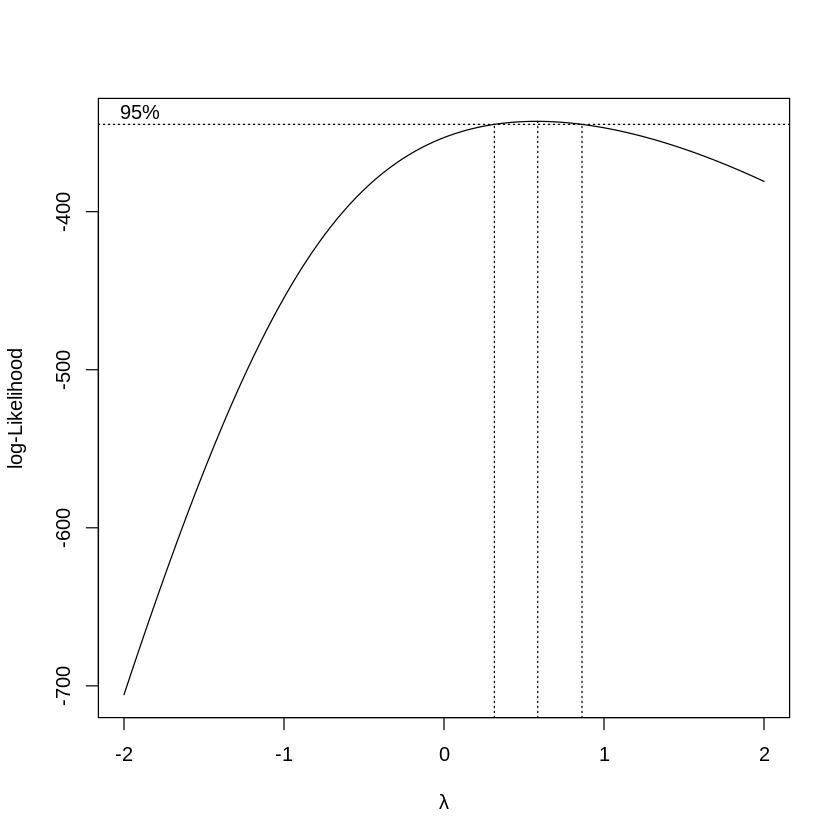

In [ ]:
library(MASS)
y= df$Sales

t = boxcox(y~1)
ind = which.max(t$y)
t$x[ind]

df $Sales = df$Sales ^(0.585858585858586)

In [ ]:
fit = lm(Sales~TV,data = df)
summary(fit)


Call:
lm(formula = Sales ~ TV, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89627 -0.37579  0.00599  0.45446  1.27556 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.2065608  0.0885788   36.20   <2e-16 ***
TV          0.0095853  0.0005206   18.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6305 on 198 degrees of freedom
Multiple R-squared:  0.6313,	Adjusted R-squared:  0.6295 
F-statistic: 339.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:
shapiro.test(df$Sales)



	Shapiro-Wilk normality test

data:  df$Sales
W = 0.9892, p-value = 0.1362


In [ ]:
install.packages("nortest")
library(nortest)
ad.test(df$Sales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Anderson-Darling normality test

data:  df$Sales
A = 0.6604, p-value = 0.08352
